# **Project Name**    - Transforming EDA Projects to Dashboards



##### **Project Type**    - Dashboards
##### **Contribution**    - Individual


# **GitHub Link -**

GitHub Link : https://github.com/Sameernadaf216

# **Tableau Dashboard Link**

Tableau Dashboard Link:https://public.tableau.com/views/Airbnb_dashboard_Book1/Airbnbdashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# **Problem Statement**


In the context of Airbnb operations, how can the utilisation of Tableau facilitate a comprehensive comparative examination between Chicago and New Orleans, two diverse urban environments?

This inquiry seeks to leverage Tableau's visual analytics capabilities to uncover and illustrate the shared attributes, disparities, and distinctive patterns inherent to Airbnb's presence in these cities, thus elevating the depth and insightfulness of the study.

# ***Let's Begin !***

In [455]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [456]:
# Mount the drive to google colab by running below code
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [457]:
# Load Dataset
path_chicago='/content/drive/MyDrive/Data_sets/Micro_csv_dataset/Chicago_listings.csv'
path_New_Orleans='/content/drive/MyDrive/Data_sets/Micro_csv_dataset/New Orleans_listings.csv'

# Read the dateset by using .read_csv() method
data_Chicago=pd.read_csv(path_chicago)
data_New_Orleans=pd.read_csv(path_New_Orleans)

# Creating the Pandas dataframe by using .DataFrame() method then assing it to variable df
df_chicago=pd.DataFrame(data_Chicago)
df_new_orleans=pd.DataFrame(data_New_Orleans)

In [458]:
# Use pd.concat() to stack df2 below df1
df_airbnb_listing = pd.concat([df_chicago, df_new_orleans], ignore_index=True)


In [459]:
# Dataset First Look for chicago dataset
df_airbnb_listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384.0,https://www.airbnb.com/rooms/2384,2.023060e+13,18-06-2023,city scrape,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,You are invited to be the sole Airbnb guest in...,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/acf6b3c0-47f2...,2613,...,4.99,4.96,4.94,NaN,f,1,0,1,0,2.14
1,7126.0,https://www.airbnb.com/rooms/7126,2.023060e+13,18-06-2023,city scrape,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,A very small studio in a wonderful neighborhoo...,"Ukrainian Village was just named ""Hottest Neig...",https://a0.muscache.com/pictures/51073/16c81c7...,17928,...,4.86,4.88,4.75,R21000075737,f,1,1,0,0,2.90
2,755701.0,https://www.airbnb.com/rooms/755701,2.023060e+13,18-06-2023,city scrape,Rental unit in Chicago · ★4.73 · 3 bedrooms · ...,"This is a wonderful, bright, very clean and mo...","Logan Square is an official community area, hi...",https://a0.muscache.com/pictures/40393621/bb8c...,3920450,...,4.96,4.57,4.71,City registration pending,f,4,4,0,0,0.22
3,10945.0,https://www.airbnb.com/rooms/10945,2.023060e+13,18-06-2023,city scrape,Rental unit in Chicago · ★4.64 · 2 bedrooms · ...,Beautiful first floor apartment in Historic Ol...,NaN,https://a0.muscache.com/pictures/58d1a420-a24b...,33004,...,4.80,4.98,4.62,2209984,t,7,7,0,0,0.59
4,790934.0,https://www.airbnb.com/rooms/790934,2.023060e+13,18-06-2023,previous scrape,Rental unit in Chicago · ★4.66 · 1 bedroom · 1...,This is for the pullout sofa bed in my living ...,We are in the far north neighborhood of Chicag...,https://a0.muscache.com/pictures/83010476/8126...,2907254,...,4.82,4.44,4.68,R21000075752,f,16,0,4,12,1.08


In [460]:
# Dataset Rows & Columns count
df_airbnb_listing.shape

(14807, 75)

In [461]:
# Dataset Info
df_airbnb_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14807 entries, 0 to 14806
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            14807 non-null  float64
 1   listing_url                                   14807 non-null  object 
 2   scrape_id                                     14807 non-null  float64
 3   last_scraped                                  14807 non-null  object 
 4   source                                        14807 non-null  object 
 5   name                                          14807 non-null  object 
 6   description                                   14780 non-null  object 
 7   neighborhood_overview                         10581 non-null  object 
 8   picture_url                                   14807 non-null  object 
 9   host_id                                       14807 non-null 

In [462]:
# Dataset Columns
df_airbnb_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

**Variables Description**

id: Unique ID assigned to each listing.


---


name: Name of the listing.


---


host_id: Unique ID assigned to each host.


---


host_name: Name of the host.


---



neighbourhood_group: Group or region where the
listing is located.


---


neighborhood: Neighborhood where the listing is situated.

---



latitude: Latitude range of the listing's location.


---


longitude: Longitude range of the listing's location.


---


room_type: Type of listing, categorized as "Entire home," "Private room," or "Shared room."


---


price: Price of the listing per night.


---


minimum_nights: Minimum number of nights required for booking the listing.


---


number_of_reviews: Total number of reviews received for the listing.


---


last_review: Content of the last review received for the listing.


---


reviews_per_month: Average count of reviews per month for the listing.


---


calculated_host_listing_count: Number of listings managed by the host.


---


availability_365: Availability of the listing throughout the year, measured in the number of days.


---


Note: Listing is nothing but the property of host

In [463]:
# Using isin() method for keeping those columns which are needed and droping all columns
df_airbnb_listing = df_airbnb_listing.loc[:, df_airbnb_listing.columns.isin(['id','name','host_id','host_name','neighbourhood','neighbourhood_group_cleansed','latitude',
       'longitude','room_type','minimum_nights','price','number_of_reviews','last_review','reviews_per_month','availability_365'])]
df_airbnb_listing.head()


,id,name,host_id,host_name,neighbourhood,neighbourhood_group_cleansed,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,last_review,reviews_per_month
0,2384.0,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,"Chicago, Illinois, United States",NaN,41.78790,-87.58780,Private room,$129.00,3,350,220,10-06-2023,2.14
1,7126.0,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,17928,Sarah,"Chicago, Illinois, United States",NaN,41.90166,-87.68021,Entire home/apt,$94.00,32,295,493,28-05-2023,2.90
2,755701.0,Rental unit in Chicago · ★4.73 · 3 bedrooms · ...,3920450,Vas,"Chicago, Illinois, United States",NaN,41.93115,-87.71836,Entire home/apt,$100.00,32,198,27,01-12-2022,0.22
3,10945.0,Rental unit in Chicago · ★4.64 · 2 bedrooms · ...,33004,At Home Inn,NaN,NaN,41.91196,-87.63981,Entire home/apt,$219.00,4,94,66,07-06-2023,0.59
4,790934.0,Rental unit in Chicago · ★4.66 · 1 bedroom · 1...,2907254,Joe,"Chicago, Illinois, United States",NaN,42.01653,-87.68788,Shared room,$234.00,1,0,139,03-02-2020,1.08


In [464]:
# Dataset Describe
df_airbnb_listing.describe(include='all')

,id,name,host_id,host_name,neighbourhood,neighbourhood_group_cleansed,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,last_review,reviews_per_month
count,1.480700e+04,14807,1.480700e+04,14807,10582,0.0,14807.000000,14807.000000,14807,14807,14807.000000,14807.000000,14807.000000,12257,12257.000000
unique,NaN,7116,NaN,3239,27,NaN,NaN,NaN,4,903,NaN,NaN,NaN,1276,NaN
top,NaN,Rental unit in Chicago · 1 bedroom · 1 bed · 1...,NaN,Blueground,"Chicago, Illinois, United States",NaN,NaN,NaN,Entire home/apt,$100.00,NaN,NaN,NaN,11-06-2023,NaN
freq,NaN,513,NaN,655,5711,NaN,NaN,NaN,12153,262,NaN,NaN,NaN,673,NaN
mean,2.986544e+17,NaN,1.724163e+08,NaN,NaN,NaN,36.426726,-88.767348,NaN,NaN,15.422368,191.272709,54.789154,NaN,1.841995
std,3.727153e+17,NaN,1.611634e+08,NaN,NaN,NaN,5.947081,1.202136,NaN,NaN,34.234316,126.554705,91.251143,NaN,1.810434
min,2.384000e+03,NaN,9.710000e+02,NaN,NaN,NaN,29.897680,-90.137480,NaN,NaN,1.000000,0.000000,0.000000,NaN,0.010000
25%,2.910562e+07,NaN,3.534246e+07,NaN,NaN,NaN,29.963125,-90.072134,NaN,NaN,2.000000,79.000000,2.000000,NaN,0.550000
50%,4.973069e+07,NaN,1.074344e+08,NaN,NaN,NaN,41.791259,-87.722810,NaN,NaN,3.000000,180.000000,20.000000,NaN,1.480000
75%,7.059170e+17,NaN,2.904318e+08,NaN,NaN,NaN,41.900318,-87.654525,NaN,NaN,30.000000,315.000000,70.000000,NaN,2.660000


In [465]:
# Dataset Duplicate Value Count
df_airbnb_listing.duplicated().sum()

18

In [466]:
# printing the shape of dataset
df_airbnb_listing.shape

(14807, 15)

In [467]:
# Missing Values/Null Values Count
df_airbnb_listing.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood                    4225
neighbourhood_group_cleansed    14807
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
availability_365                    0
number_of_reviews                   0
last_review                      2550
reviews_per_month                2550
dtype: int64

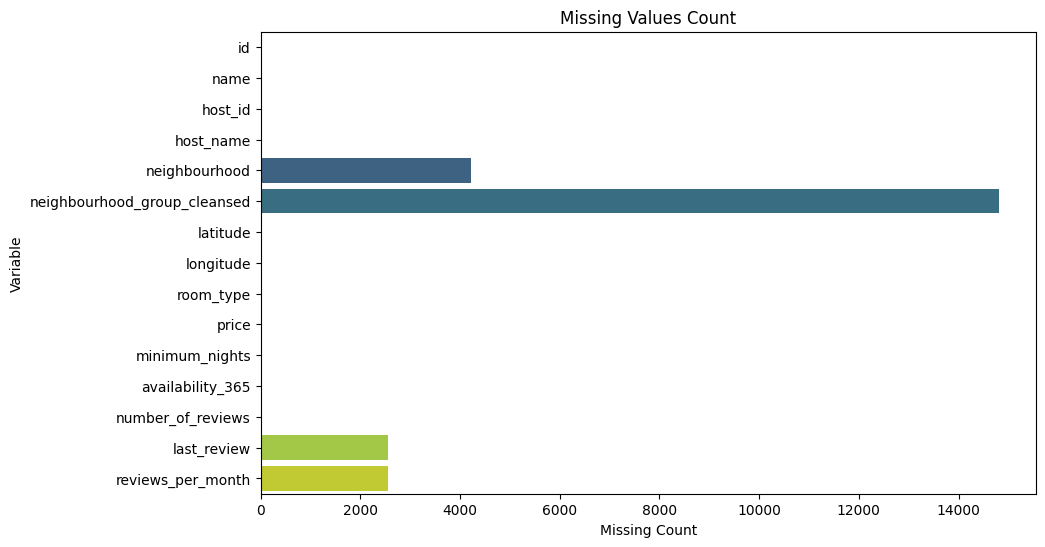

In [468]:
# Visualizing the missing values
missing_data = df_airbnb_listing.isnull().sum().reset_index()
missing_data.columns = ['Variable', 'Missing Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Missing Count', y='Variable', data=missing_data, palette='viridis')
plt.title('Missing Values Count')
plt.xlabel('Missing Count')
plt.ylabel('Variable')
plt.show()


In [469]:
# Droping the neighbourhood_group_cleansed column
df_airbnb_listing.drop(['neighbourhood_group_cleansed'],axis=1, inplace=True)

In [470]:
# Checking unique values in neighbourhood column
df_airbnb_listing['neighbourhood'].unique()

array(['Chicago, Illinois, United States', nan,
       'Oak Park, Illinois, United States',
       'Chicago Heights, Illinois, United States',
       'Chicago , Illinois, United States',
       'Bucktown, Chicago, Illinois, United States',
       'Oak Lawn, Illinois, United States', 'Chicago, United States',
       'Rogers Park, Il, United States',
       'Santa Barbara, California, United States',
       'Chicago, Il, United States',
       'Harwood Heights, Illinois, United States',
       '芝加哥, Illinois, United States',
       'Evergreen Park, Illinois, United States',
       'Norridge, Illinois, United States',
       'Riverdale, Illinois, United States',
       'New Orleans, Louisiana, United States',
       'ByWater-Marigny, New Orleans, Louisiana, United States',
       'ByWater-Marigny, New Orleans , Louisiana, United States',
       'Arabi, Louisiana, United States',
       'New Orleans, Louisiana, US, Louisiana, United States',
       'New Orleans, United States', 'New Orlean

In [471]:
# Replacing the null values with "unkown" in neighbourhood
df_airbnb_listing['neighbourhood'].fillna('Unknown', inplace=True)

# A custom function which can remove extra spaces
def handle_neighbourhood(value):
  if value=='New Orleans,, La, United States':
    value='New Orleans , La, United States'
  elif value=='芝加哥,Illinois,United States':
    value='Unknown'



  split_value= str(value).split(',')
  result=[]
  for i in split_value :
    i=i.strip()
    result.append(i)
  delimiter = ','
  str_result = delimiter.join(result)
  return str_result.strip()


df_airbnb_listing['neighbourhood_']= df_airbnb_listing['neighbourhood'].apply(handle_neighbourhood)
df_airbnb_listing['neighbourhood_'].apply(str.strip)
df_airbnb_listing['neighbourhood_'].unique()

array(['Chicago,Illinois,United States', 'Unknown',
       'Oak Park,Illinois,United States',
       'Chicago Heights,Illinois,United States',
       'Bucktown,Chicago,Illinois,United States',
       'Oak Lawn,Illinois,United States', 'Chicago,United States',
       'Rogers Park,Il,United States',
       'Santa Barbara,California,United States',
       'Chicago,Il,United States',
       'Harwood Heights,Illinois,United States',
       '芝加哥,Illinois,United States',
       'Evergreen Park,Illinois,United States',
       'Norridge,Illinois,United States',
       'Riverdale,Illinois,United States',
       'New Orleans,Louisiana,United States',
       'ByWater-Marigny,New Orleans,Louisiana,United States',
       'Arabi,Louisiana,United States',
       'New Orleans,Louisiana,US,Louisiana,United States',
       'New Orleans,United States', 'New Orleans,La,United States',
       'New orleans,Louisiana,United States',
       'Gretna,Louisiana,United States',
       'Terrytown,Louisiana,United S

In [472]:
# droping the "neighbourhood" column
df_airbnb_listing.drop(['neighbourhood'],axis=1, inplace=True)

In [473]:
# Calculate an estimated 'last_review' date based on 'number_of_reviews' and 'reviews_per_month'
df_airbnb_listing['last_review'].fillna('unknown', inplace=True)

In [474]:
# replacing the null values in 'reviews_per_month' with mean value of column
df_airbnb_listing['reviews_per_month'].fillna(df_airbnb_listing['reviews_per_month'].mean(), inplace=True)
# Convert 'reviews_per_month' from float to int
df_airbnb_listing['reviews_per_month'] = df_airbnb_listing['reviews_per_month'].astype(int)


In [475]:
# printing the unique value of price column
df_airbnb_listing['price'].unique()[0:150]

array(['$129.00', '$94.00', '$100.00', '$219.00', '$234.00', '$85.00',
       '$92.00', '$120.00', '$110.00', '$86.00', '$130.00', '$200.00',
       '$136.00', '$50.00', '$95.00', '$295.00', '$89.00', '$133.00',
       '$91.00', '$251.00', '$79.00', '$312.00', '$179.00', '$246.00',
       '$45.00', '$140.00', '$108.00', '$118.00', '$60.00', '$132.00',
       '$170.00', '$138.00', '$48.00', '$149.00', '$204.00', '$32.00',
       '$103.00', '$256.00', '$692.00', '$212.00', '$146.00', '$102.00',
       '$175.00', '$449.00', '$250.00', '$27.00', '$75.00', '$184.00',
       '$119.00', '$279.00', '$51.00', '$101.00', '$193.00', '$67.00',
       '$558.00', '$141.00', '$64.00', '$70.00', '$134.00', '$220.00',
       '$196.00', '$115.00', '$153.00', '$225.00', '$82.00', '$159.00',
       '$96.00', '$608.00', '$822.00', '$150.00', '$1,193.00', '$39.00',
       '$364.00', '$160.00', '$37.00', '$282.00', '$1,607.00', '$521.00',
       '$55.00', '$392.00', '$258.00', '$52.00', '$113.00', '$148.00',

In [476]:
# removing the "$" and "," from price value and convert the datatype to float
df_airbnb_listing['price'] = df_airbnb_listing['price'].str.replace('$', '').str.replace(',', '').astype(float)
df_airbnb_listing = df_airbnb_listing[df_airbnb_listing['price'] > 0]

In [477]:
# printing the unique value of price column
df_airbnb_listing['price'].unique()[0:150]

array([ 129.,   94.,  100.,  219.,  234.,   85.,   92.,  120.,  110.,
         86.,  130.,  200.,  136.,   50.,   95.,  295.,   89.,  133.,
         91.,  251.,   79.,  312.,  179.,  246.,   45.,  140.,  108.,
        118.,   60.,  132.,  170.,  138.,   48.,  149.,  204.,   32.,
        103.,  256.,  692.,  212.,  146.,  102.,  175.,  449.,  250.,
         27.,   75.,  184.,  119.,  279.,   51.,  101.,  193.,   67.,
        558.,  141.,   64.,   70.,  134.,  220.,  196.,  115.,  153.,
        225.,   82.,  159.,   96.,  608.,  822.,  150., 1193.,   39.,
        364.,  160.,   37.,  282., 1607.,  521.,   55.,  392.,  258.,
         52.,  113.,  148.,  152.,   90.,   35.,  112.,  145.,  171.,
         69.,   65.,   71.,  188.,  299.,  131.,  128.,  185.,  135.,
        125.,  155.,   84.,  209.,  174.,  104.,   25.,  106.,  105.,
        248.,  207.,   42.,  297.,  303.,  151.,  201.,  268.,   40.,
         28.,  500.,  143.,  157.,   61.,   29.,  259.,  214.,   99.,
        223.,   33.,

In [478]:
df_airbnb_listing = df_airbnb_listing[df_airbnb_listing['availability_365'] > 0]

In [479]:
df_airbnb_listing['id'].astype(int)

0                      2384
1                      7126
2                    755701
3                     10945
5                    863120
                ...        
14802    970848000000000000
14803    971023000000000000
14804    971622000000000000
14805    971690000000000000
14806    971756000000000000
Name: id, Length: 13088, dtype: int64

In [480]:
df_airbnb_listing['host_id'].astype(int)

0             2613
1            17928
2          3920450
3            33004
5          4525503
           ...    
14802    442915263
14803    428276486
14804     68337970
14805     14988904
14806     33076245
Name: host_id, Length: 13088, dtype: int64

In [481]:
# getting the description of dataset
df_airbnb_listing.describe(include='all')

,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,last_review,reviews_per_month,neighbourhood_
count,1.308800e+04,13088,1.308800e+04,13088,13088.000000,13088.000000,13088,13088.000000,13088.000000,13088.000000,13088.000000,13088,13088.000000,13088
unique,NaN,6507,NaN,2900,NaN,NaN,4,NaN,NaN,NaN,NaN,964,NaN,18
top,NaN,Rental unit in Chicago · 1 bedroom · 1 bed · 1...,NaN,Blueground,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,unknown,NaN,"Chicago,Illinois,United States"
freq,NaN,434,NaN,577,NaN,NaN,10920,NaN,NaN,NaN,NaN,2201,NaN,5174
mean,3.194090e+17,NaN,1.768304e+08,NaN,36.567379,-88.738851,NaN,211.372097,14.523839,216.394789,57.511767,NaN,1.439487,NaN
std,3.772443e+17,NaN,1.633556e+08,NaN,5.933647,1.199311,NaN,302.644794,35.026644,112.619412,94.285642,NaN,1.668941,NaN
min,2.384000e+03,NaN,9.710000e+02,NaN,29.897680,-90.137480,NaN,12.000000,1.000000,1.000000,0.000000,NaN,0.000000,NaN
25%,3.161769e+07,NaN,3.654527e+07,NaN,29.963450,-90.071500,NaN,94.000000,2.000000,114.000000,2.000000,NaN,0.000000,NaN
50%,5.130275e+07,NaN,1.107147e+08,NaN,41.800975,-87.717904,NaN,145.000000,3.000000,233.000000,22.000000,NaN,1.000000,NaN
75%,7.169998e+17,NaN,3.057254e+08,NaN,41.901401,-87.653720,NaN,235.000000,30.000000,322.000000,74.000000,NaN,2.000000,NaN


In [482]:
# printing the information of dataset
df_airbnb_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13088 entries, 0 to 14806
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 13088 non-null  float64
 1   name               13088 non-null  object 
 2   host_id            13088 non-null  int64  
 3   host_name          13088 non-null  object 
 4   latitude           13088 non-null  float64
 5   longitude          13088 non-null  float64
 6   room_type          13088 non-null  object 
 7   price              13088 non-null  float64
 8   minimum_nights     13088 non-null  int64  
 9   availability_365   13088 non-null  int64  
 10  number_of_reviews  13088 non-null  int64  
 11  last_review        13088 non-null  object 
 12  reviews_per_month  13088 non-null  int64  
 13  neighbourhood_     13088 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 1.5+ MB


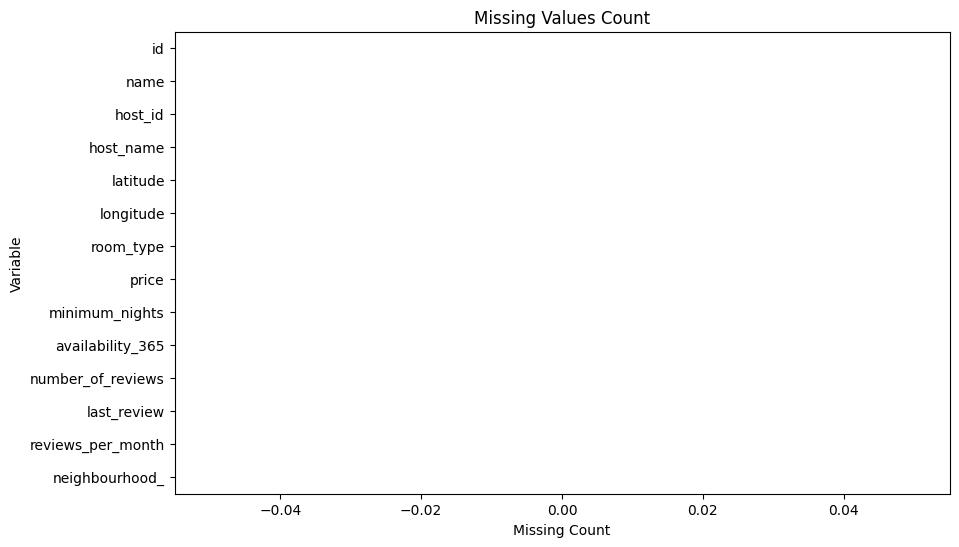

In [483]:
# Visualizing the missing values
missing_data = df_airbnb_listing.isnull().sum().reset_index()
missing_data.columns = ['Variable', 'Missing Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Missing Count', y='Variable', data=missing_data, palette='viridis')
plt.title('Missing Values Count')
plt.xlabel('Missing Count')
plt.ylabel('Variable')
plt.show()


In [484]:
# To save updated dataset to a CSV file
df_airbnb_listing.to_excel('output_df_airbnb_listing_listings.xlsx', index=False)